# h1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

In [2]:
df = pd.read_csv('./data/kc_house_data.csv')

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
def get_location_interactive(df=df,
                             lon='long',
                             lat='lat',
                             target='price',
                             mapbox_style="open-street-map"):
    """
    +++ Predefined function +++
    Returns a map with markers for houses based on lat and long.

    Parameters:
    ===========
    mapbox_style = str; options are following:
        > "white-bg" yields an empty white canvas which results in no external HTTP requests

        > "carto-positron", "carto-darkmatter", "stamen-terrain",
          "stamen-toner" or "stamen-watercolor" yield maps composed of raster tiles 
          from various public tile servers which do not require signups or access tokens

        > "open-street-map" does work
    """
    fig = px.scatter_mapbox(
        df,
        lat=df[lat],
        lon=df[lon],
        color=target,
        color_continuous_scale=["green", 'blue', 'red', 'gold'],
        zoom=8.5,
        range_color=[0, df['price'].quantile(0.95)],
        height=700,
        title='House location',
        opacity=.5,
        center={
            'lat': df.lat.mode()[0],
            'lon': df.long.mode()[0]
        })
    fig.update_layout(mapbox_style=mapbox_style)
    fig.update_layout(margin={"r": 0, "l": 0, "b": 0})
    fig.show()

In [5]:
def get_location_static(df=df,
                        lon='long',
                        lat='lat',
                        target='price',
                        mapbox_style="carto-positron"):
    """
    +++ Predefined function +++
    Returns a map with markers for houses based on lat and long.

    Parameters:
    ===========
    mapbox_style = str; options are following:
        > "white-bg" yields an empty white canvas which results in no external HTTP requests

        > "carto-positron", "carto-darkmatter", "stamen-terrain",
          "stamen-toner" or "stamen-watercolor" yield maps composed of raster tiles 
          from various public tile servers which do not require signups or access tokens

        > "open-street-map" does not work
    """

    fig = px.scatter_mapbox(
        df,
        lat=df[lat],
        lon=df[lon],
        color=target,
        color_continuous_scale=["green", 'blue', 'red', 'gold'],
        zoom=8.5,
        range_color=[0, df['price'].quantile(0.95)],
        height=700,
        title='House location',
        opacity=.5,
        center={
            'lat': df.lat.mode()[0],
            'lon': df.long.mode()[0]
        })
    fig.update_layout(mapbox_style=mapbox_style)
    fig.update_layout(margin={"r": 0, "l": 0, "b": 0})
    import plotly.io as plyIo
    img_bytes = fig.to_image(format="png", width=1200, height=700, scale=1)
    from IPython.display import Image
    display(Image(img_bytes))

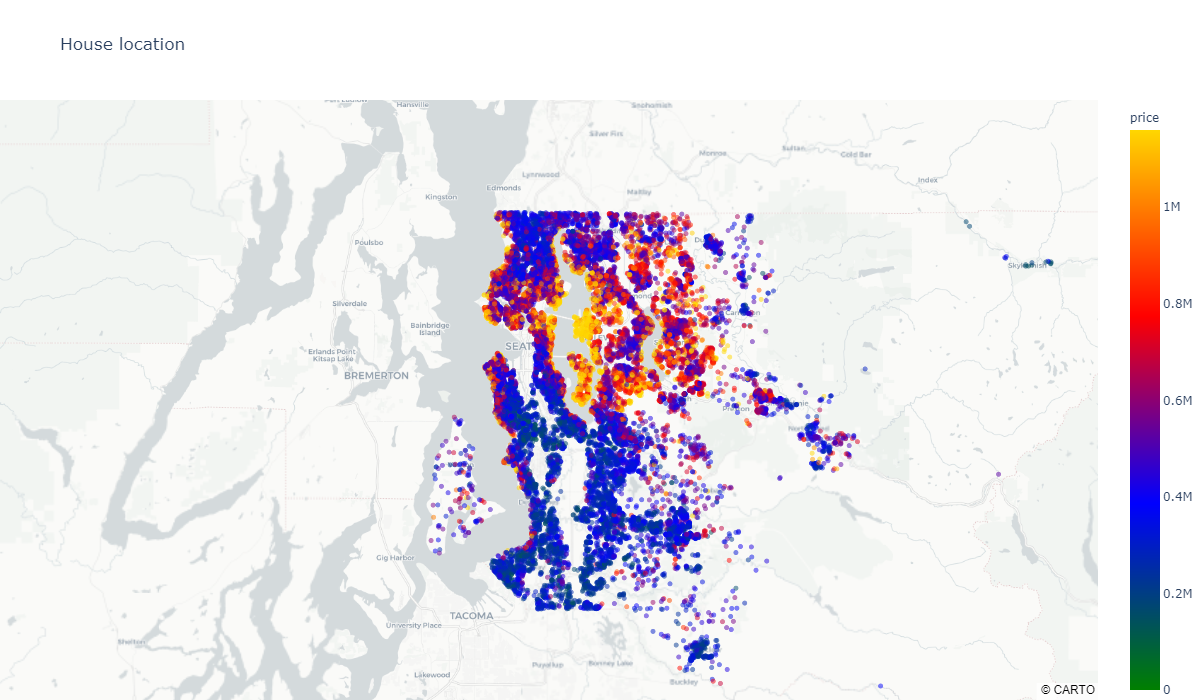

In [6]:
get_location_static(df=df, lon='long', lat='lat', target='price')

In [7]:
def price_vs_year_built():
    """
    +++ Predefined function +++
    """
    chart = df.groupby('yr_built')[['price']].agg(['count', 'mean'])
    chart.columns = chart.columns.droplevel(0)
    chart.columns = ["count", "data"]
    chart.index.name = 'labels'
    chart = chart.reset_index()
    chart = chart
    charts = [
        go.Bar(x=chart['labels'].values,
               y=chart['data'].values,
               name='Price',
               marker_color='silver'),
        go.Scatter(x=chart['labels'].values,
                   y=chart['count'].values,
                   yaxis='y2',
                   name='Frequency',
                   mode='lines+markers',
                   marker_color='red')
    ]
    figure = go.Figure(data=charts,
                       layout=go.Layout({
                           'barmode': 'overlay',
                           'legend': {
                               'xanchor': 'left',
                               'x': .9,
                               'y': 1.02,
                               'yanchor': 'bottom',
                               'orientation': 'h'
                           },
                           'title': {
                               'text':
                               'Average price Categorized by year built'
                           },
                           'xaxis': {
                               'dtick':
                               1,
                               'title': {
                                   'text': 'year built'
                               },
                               'range': [
                                   chart['labels'].values.min() - 1,
                                   chart['labels'].values.max() + 1
                               ]
                           },
                           'yaxis': {
                               'side': 'left',
                               'title': {
                                   'text': 'Average price'
                               }
                           },
                           'yaxis2': {
                               'overlaying': 'y',
                               'side': 'right',
                               'title': {
                                   'text': 'Sale Frequency'
                               }
                           }
                       }))

    figure.update_layout(template="plotly_dark")
    figure.show()

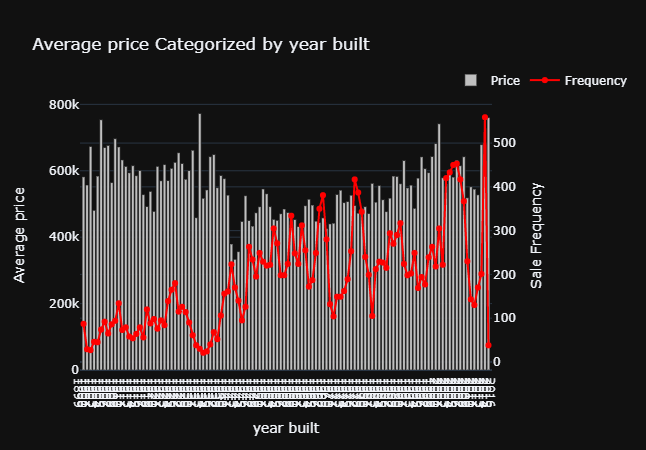

In [9]:
price_vs_year_built()

In [1]:
x = 1